<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lasso Regression</a></span><ul class="toc-item"><li><span><a href="#Untransformed-lot-area" data-toc-modified-id="Untransformed-lot-area-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Untransformed lot area</a></span></li><li><span><a href="#All-log-transformed-area" data-toc-modified-id="All-log-transformed-area-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>All log transformed area</a></span></li><li><span><a href="#Partially-transformed" data-toc-modified-id="Partially-transformed-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Partially transformed</a></span></li></ul></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Elastic Net</a></span><ul class="toc-item"><li><span><a href="#Untransformed-area" data-toc-modified-id="Untransformed-area-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Untransformed area</a></span></li><li><span><a href="#Log-transformed-areas" data-toc-modified-id="Log-transformed-areas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Log transformed areas</a></span></li></ul></li></ul></div>

# Project 2: Housing

You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt

- Explore the dataset, clean data, add features (if you can think of any)
- Identify features that can predict sale price of a house
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Build a model. What are the best predictors of price?

In [1]:
# Data EDA, viz and wrangling

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import mean_squared_error


In [2]:
def dummy_and_drop(df, colname):
    
    min_value = df[colname].value_counts().idxmin()
    
    dummy_df = pd.get_dummies(df[colname], prefix=colname)
    dummy_df = dummy_df.drop(colname+"_"+str(min_value), axis=1)
    
    return dummy_df

# Load data

The data in `housing.csv` was cleaned and saved as `housing.initial.csv`. After EDA and data wrangling, the data was saved in `housing.3.csv`

In [3]:
# Load housing data

housing = pd.read_csv('../../data/housing.3.csv', index_col='Id')

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageFinish_RFn,GarageFinish_Unf,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1,0,0,0,0,1,0,0,0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,1,0,0,0,0,1,0,0,0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,1,0,0,0,0,1,0,0,0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,1,0,0,0,1,0,0,0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,1,0,0,0,0


In [4]:
print('Data has {} houses with {} features'.format(housing.shape[0], housing.shape[1]))

Data has 1460 houses with 195 features


# Filter features

In [5]:
# Select numeric features

housing_num = housing.select_dtypes(include='number')

housing_num.shape

(1460, 147)

In [6]:
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_RFn,GarageFinish_Unf,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,1,0,0,0,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,1,0,0,0,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,1,0,0,0,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,0,0,0,1,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,1,0,0,0,0


In [7]:
for i, j in zip([0, 30, 60, 90, 120], [30, 60, 90, 120, 148]):
    print(housing_num.columns[i:j])


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')
Index(['3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'MSSubClass_fix', 'LotFrontage_Imp', 'SalePrice_log',
       'FunctionalNum', 'LotArea_log', 'BuiltRemodDiff', 'LandSlopeNum',
       'Street_Pave', 'RoofMatl_CompShgBin', 'ExtMatlNum', 'ExterCondNum',
       'ExterQualNum', 'BsmtQualNum', 'BsmtCondNum', 'HeatingQCNum',
       'KitchenQualNum', 'FireplaceQuNum', 'GarageQualNum', 'GarageCondNum',
       'BsmtExposureNum', 'BsmtFinTypeNum', 'BsmtLwQ'

In [26]:
# Drop unneeded numeric columns

num_drop = ['MSSubClass', 'MSSubClass_fix', 'LotFrontage']

housing_num = housing_num.drop(num_drop, axis=1)

housing_num.shape

(1460, 142)

In [8]:
#Filter common features

common = housing_num.loc[:, 'OverallQual': 'YrSold'].drop(['WoodDeckSF', 'OpenPorchSF', 
                                                           'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                                           '1stFlrSF', 'GrLivArea'],
                                                          axis=1)

add_cols = ['LotFrontage_Imp', 'FunctionalNum', 'BuiltRemodDiff', 'LandSlopeNum',
            'Street_Pave', 'ExtMatlNum', 'ExterCondNum', 'ExterQualNum', 'BsmtQualNum', 
            'BsmtCondNum', 'HeatingQCNum', 'KitchenQualNum', 'FireplaceQuNum', 'GarageQualNum', 
            'GarageCondNum', 'BsmtExposureNum', 'BsmtFinTypeNum', 'BsmtALQ', 'BsmtGLQ', 
            'BsmtALQ', 'BsmtGLQ', 'BsmtLwQ', 'BsmtBLQ', 'BsmtRec', 'BsmtUnf', 'BsmtFinRatio',
            'BsmtUnfRatio', 'Utilities_AllPub', 'CentralAirNum', 'GarageYrDiff',
            'PavedDriveNum', 'PoolQCNum', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
            'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
            'GarageType_Detchd', 'GarageType_No', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 
            'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_None', 'MiscFeature_Gar2', 'MiscFeature_Othr',
            'MiscFeature_Shed', 'MiscFeature_TenC']

add_common = housing.loc[:, add_cols]

all_common = pd.concat([common, add_common], axis=1)

all_common.shape

(1460, 78)

In [9]:
# Filter porch total and types

porch_totals = housing[['TotalPorchSF', 'TotalPorchTypeNum']]
porch_fine = housing[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

In [10]:
# FIlter roof styles

roofstyle_broad = housing_num.filter(like='RoofStyleCat_')
roofstyle_fine = housing_num.filter(like='RoofStyle_')

In [11]:
# Filter roof materials

roofmat_broad = housing[['RoofMatl_CompShgBin']]
roofmat_fine = housing.filter(like='RoofMatl').drop('RoofMatl_CompShgBin', axis=1)

In [12]:
# Divide exterior features

exterior_fine = housing_num.filter(like='Exterior').drop('ExteriorOtherLT1', axis=1)
exterior_broad = housing_num.filter(like='Exterior').drop(['ExteriorCBlock', 
                                                           'ExteriorImStucc', 
                                                           'ExteriorAsphShn',
                                                           'ExteriorStone',
                                                           'ExteriorBrkComm'], axis=1)

In [13]:
# Divide foundation

found_broad = housing_num.filter(like='FoundationCat_')
found_fine = housing_num.filter(like='Foundation_')

In [14]:
# Divide heating features

heating_broad = housing_num.filter(like='HeatingCat_')
heating_fine = housing_num.filter(like='Heating_')

In [15]:
# Divide eletrical

electrical_fine = housing_num.filter(like='Eletrical_')
electrical_broad = housing_num.filter(like='EletricalCat_')

In [16]:
# Create data with broad and fine features

broad = pd.concat([all_common, porch_totals, roofstyle_broad, roofmat_broad, 
                   exterior_broad, found_broad, heating_broad, electrical_broad], axis=1) 

fine = pd.concat([all_common, porch_fine, roofstyle_fine, roofmat_fine, 
                   exterior_fine, found_fine, heating_fine, electrical_fine], axis=1) 

In [60]:
## Add log transformed features

log_feat = housing_num.filter(like="_log")
broad_log = pd.concat([broad, log_feat], axis=1)
fine_log = pd.concat([fine, log_feat], axis=1)

# Add untransformed features

notrans_cols = [x.replace("_log", "") for x in log_feat.columns.tolist()]
notrans_feat = housing[notrans_cols]

broad_all = pd.concat([broad, notrans_feat], axis=1)
fine_all = pd.concat([fine, notrans_feat], axis=1)

# Add log transformed lot area with untransformed other values
comb_log = housing_num[['LotArea_log', '1stFlrSF', 'GrLivArea', 'SalePrice']]
broad2_all = pd.concat([broad, comb_log], axis=1)

In [28]:
print("Data with broad categories: ", broad.shape)
print("Data with fine categories: ", fine.shape)

Data with broad categories:  (1460, 100)
Data with fine categories:  (1460, 122)


In [29]:
def split_yr_sold(df, year):
    
    year_df = df[df['YrSold'] == year]
    rest_df = df[df['YrSold'] != year]
    
    return rest_df, year_df

In [61]:
# Divide broad data into training and evaluation

broad_log_train, broad_log_eval = split_yr_sold(broad_log, 2010)
broad_train, broad_eval = split_yr_sold(broad_all, 2010)
broad2_train, broad2_eval = split_yr_sold(broad2_all, 2010)


In [ ]:
fine_log_train, fine_log_eval = split_yr_sold(fine_log, 2010)

In [62]:
# Split and transform broad data predictors

scaler = StandardScaler()

X = broad_train.drop(['YrSold', 'SalePrice'], axis=1)
scaler.fit(X)
Xscale = scaler.transform(X)
Xtest_scale = scaler.transform(broad_eval.drop(['YrSold', 'SalePrice'], axis=1))

X2 = broad2_train.drop(['YrSold', 'SalePrice'], axis=1)
scaler.fit(X2)
X2scale = scaler.transform(X2)
X2test_scale = scaler.transform(broad2_eval.drop(['YrSold', 'SalePrice'], axis=1))

Xlog = broad_log_train.drop(['YrSold', 'SalePrice_log'], axis=1)
scaler.fit(Xlog)
Xlog_scale = scaler.transform(Xlog)
Xlog_test_scale = scaler.transform(broad_log_eval.drop(['YrSold', 'SalePrice_log'], axis=1))

# Target

y_train = broad_train['SalePrice']
y_test = broad_eval['SalePrice']

ylog_train = broad_log_train['SalePrice_log']
ylog_test = broad_log_eval['SalePrice_log']

## Lasso Regression

Try broad data features with untransformed area/price

### Untransformed lot area

In [33]:
# Initialise lasso

alphas = np.logspace(-6, 6, 200)
lassoCV = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)

In [34]:
lassoCV.fit(Xscale, y_train)

LassoCV(alphas=array([1.00000e-06, 1.14895e-06, ..., 8.70359e+05, 1.00000e+06]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

In [35]:
# Get 10-fold CV R2

lasso = Lasso(alpha=lassoCV.alpha_, max_iter=10000, random_state=42)

cross_val_score(lasso, Xscale, y=y_train, cv=10).mean()

0.8029477919369092

In [36]:
lassoCV.score(Xtest_scale, y_test)

0.8447740637256482

In [37]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(y="variable", x="coef", data=model_coefs, orient='h')

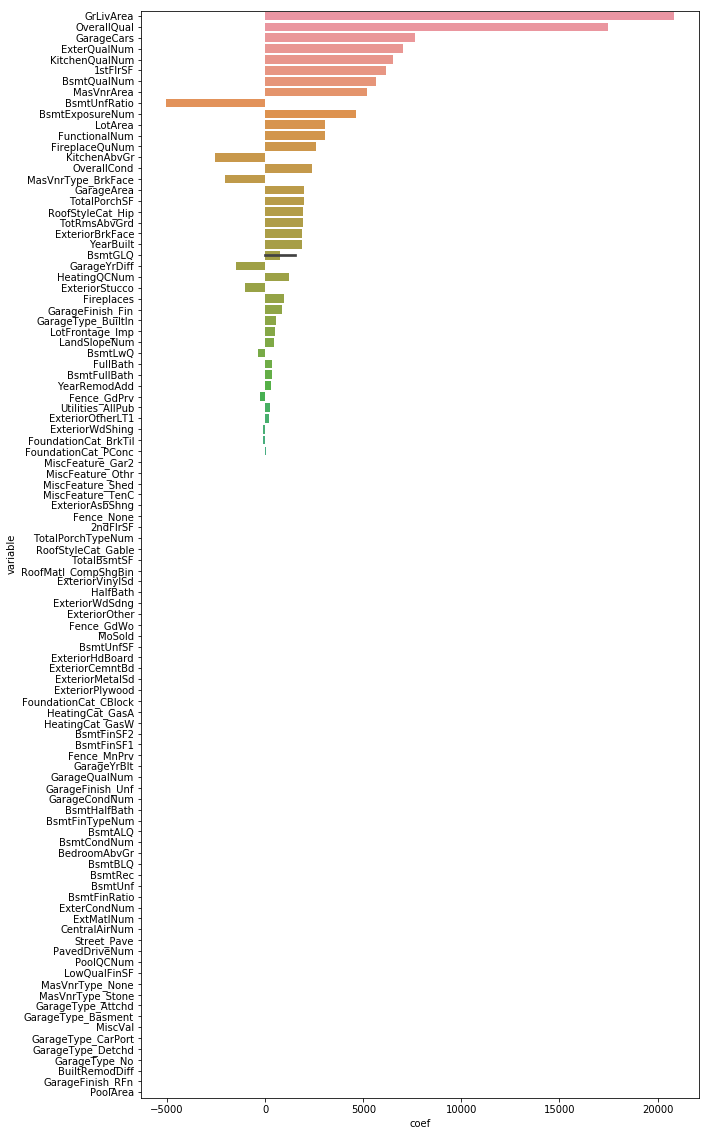

In [38]:
Xscale_df = pd.DataFrame(data=Xscale, columns=broad_train.drop(['YrSold', 'SalePrice'], axis=1).columns)

plt.figure(figsize=(10, 20))
view_coeff(Xscale_df, lassoCV)
plt.show()

In [39]:
preds = lassoCV.predict(Xtest_scale)

mean_squared_error(broad_eval['SalePrice'], preds) ** (1/2)

31606.08491012985

### All log transformed area

In [42]:
lassoCV.fit(Xlog_scale, y_train)

LassoCV(alphas=array([1.00000e-06, 1.14895e-06, ..., 8.70359e+05, 1.00000e+06]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

In [43]:
# Get 10-fold CV R2

lasso = Lasso(alpha=lassoCV.alpha_, max_iter=10000, random_state=42)

cross_val_score(lasso, Xlog_scale, y=y_train, cv=10).mean()

0.8133024469976368

In [44]:
lassoCV.score(Xlog_test_scale, y_test)

0.8553528376092472

In [58]:
log_preds = lassoCV.predict(Xlog_test_scale)

print("RMSE: ", mean_squared_error(y_test, log_preds) ** (1/2))

RMSE:  30510.09202974934


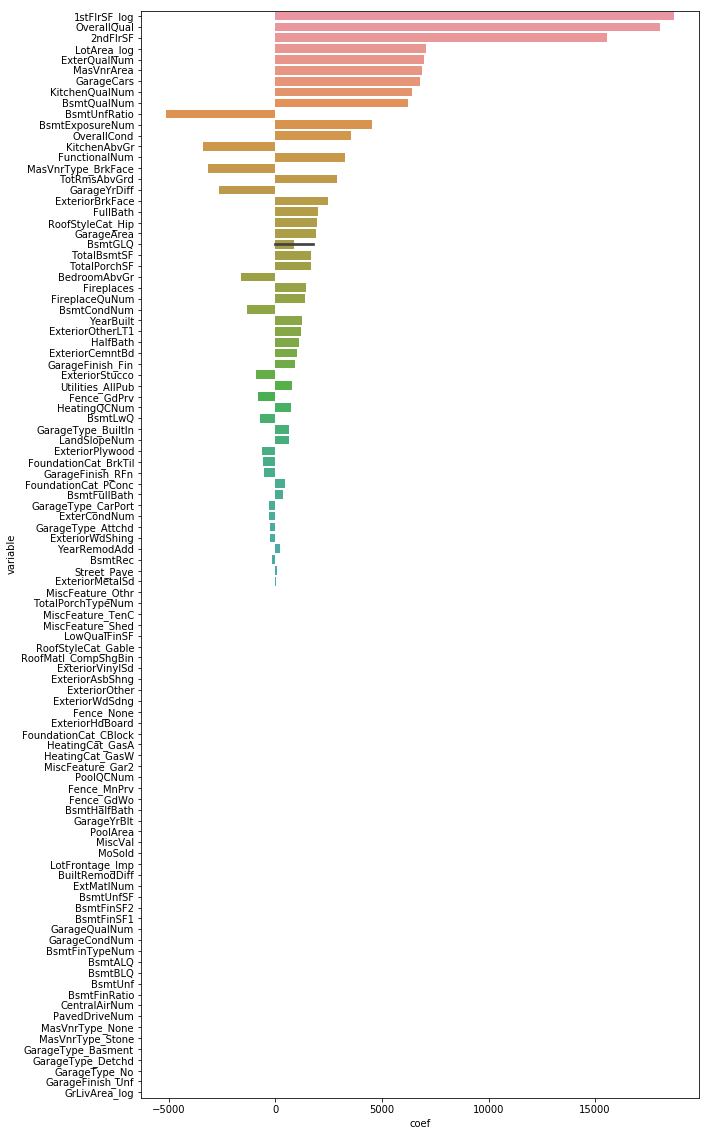

In [46]:
Xlog_scale_df = pd.DataFrame(data=Xlog_scale, 
                             columns=broad_log_train.drop(['YrSold', 'SalePrice_log'], axis=1).columns)

plt.figure(figsize=(10, 20))
view_coeff(Xlog_scale_df, lassoCV)
plt.show()

### Partially transformed

In [65]:
lassoCV.fit(X2scale, y_train)

LassoCV(alphas=array([1.00000e-06, 1.14895e-06, ..., 8.70359e+05, 1.00000e+06]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=42, selection='cyclic', tol=0.0001,
    verbose=False)

In [66]:
# Get 10-fold CV R2

lasso = Lasso(alpha=lassoCV.alpha_, max_iter=10000, random_state=42)

cross_val_score(lasso, X2scale, y=y_train, cv=10).mean()

0.8104879051867051

In [67]:
lassoCV.score(X2test_scale, y_test)

0.8498154506636149

In [68]:
partial_preds = lassoCV.predict(X2test_scale)

print("RMSE: ", mean_squared_error(y_test, partial_preds) ** (1/2))

RMSE:  31088.601520528096


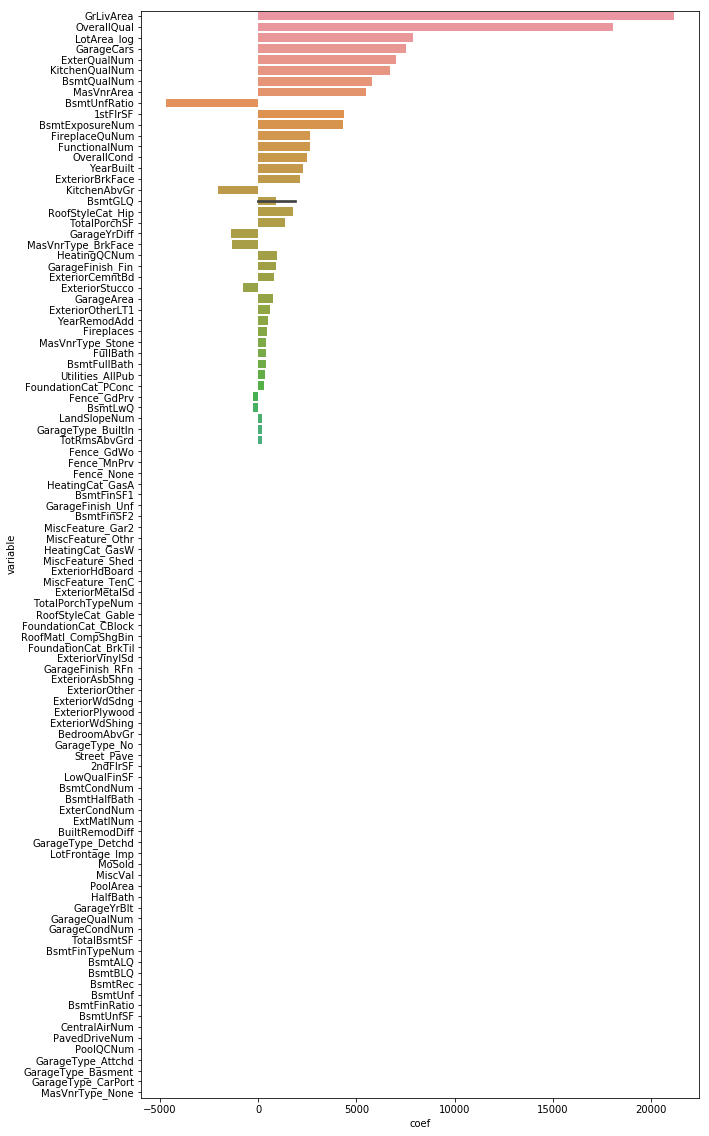

In [69]:
X2_scale_df = pd.DataFrame(data=X2scale, 
                             columns=broad2_train.drop(['YrSold', 'SalePrice'], axis=1).columns)

plt.figure(figsize=(10, 20))
view_coeff(X2_scale_df, lassoCV)
plt.show()

## Elastic Net

### Untransformed area

In [47]:
elasticCV = ElasticNetCV(alphas=alphas, max_iter=10000, random_state=42)

In [48]:
elasticCV.fit(Xscale, y_train)

/home/maianh/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([1.00000e-06, 1.14895e-06, ..., 8.70359e+05, 1.00000e+06]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=42,
       selection='cyclic', tol=0.0001, verbose=0)

In [49]:
elastic = ElasticNet(alpha=elasticCV.alpha_, max_iter=10000, random_state=42)

cross_val_score(elastic, Xscale, y_train, cv=10).mean()

0.8072380052656273

In [50]:
print("Test R2: ", elasticCV.score(Xtest_scale, y_test))

Test R2:  0.8491572317544847


In [51]:
elast_preds = elasticCV.predict(Xtest_scale)

print("RMSE: ", mean_squared_error(broad_eval['SalePrice'], elast_preds) ** (1/2))

RMSE:  31156.6535717611


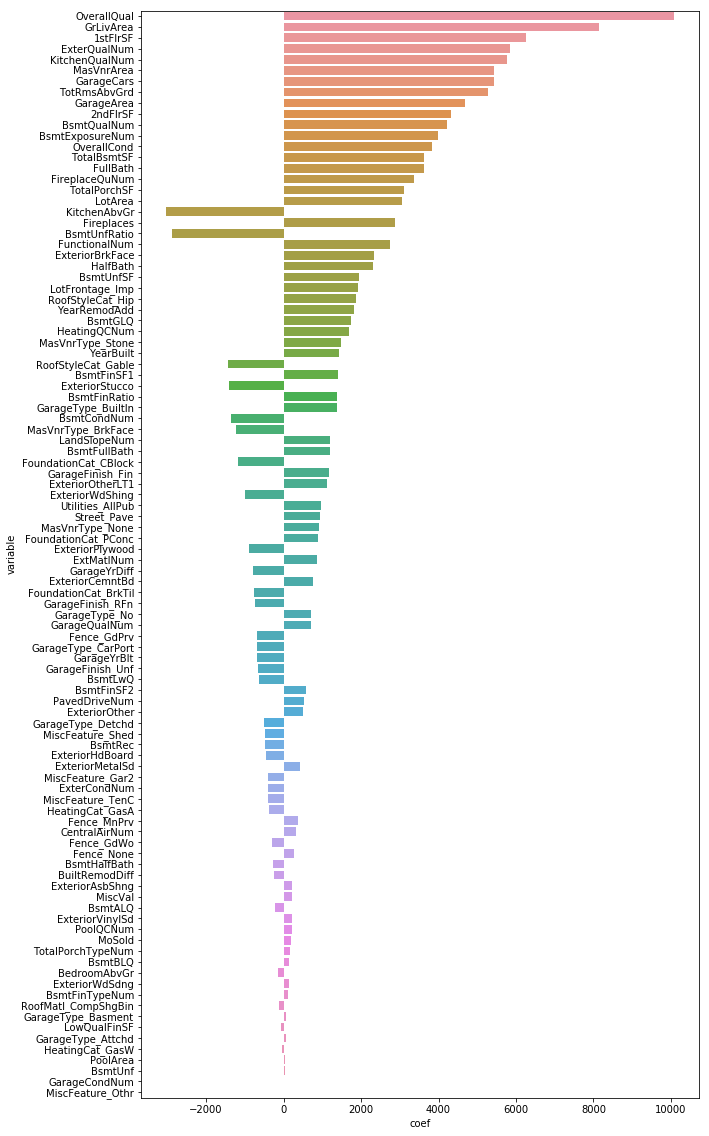

In [52]:
Xscale_df = pd.DataFrame(data=Xscale, 
                             columns=broad_train.drop(['YrSold', 'SalePrice'], axis=1).columns)

plt.figure(figsize=(10, 20))
view_coeff(Xscale_df, elasticCV)
plt.show()

### Log transformed areas

In [53]:
# Fit with log-transform lot area

elasticCV.fit(Xlog_scale, y_train)

/home/maianh/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([1.00000e-06, 1.14895e-06, ..., 8.70359e+05, 1.00000e+06]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=10000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=42,
       selection='cyclic', tol=0.0001, verbose=0)

In [54]:
elastic = ElasticNet(alpha=elasticCV.alpha_, max_iter=10000, random_state=42)

print("10-fold CV training R2: ", cross_val_score(elastic, Xlog_scale, y_train, cv=10).mean())

10-fold CV training R2:  0.8156559379805903


In [55]:
print("Test R2: ", elasticCV.score(Xlog_test_scale, y_test))

Test R2:  0.8579084641194841


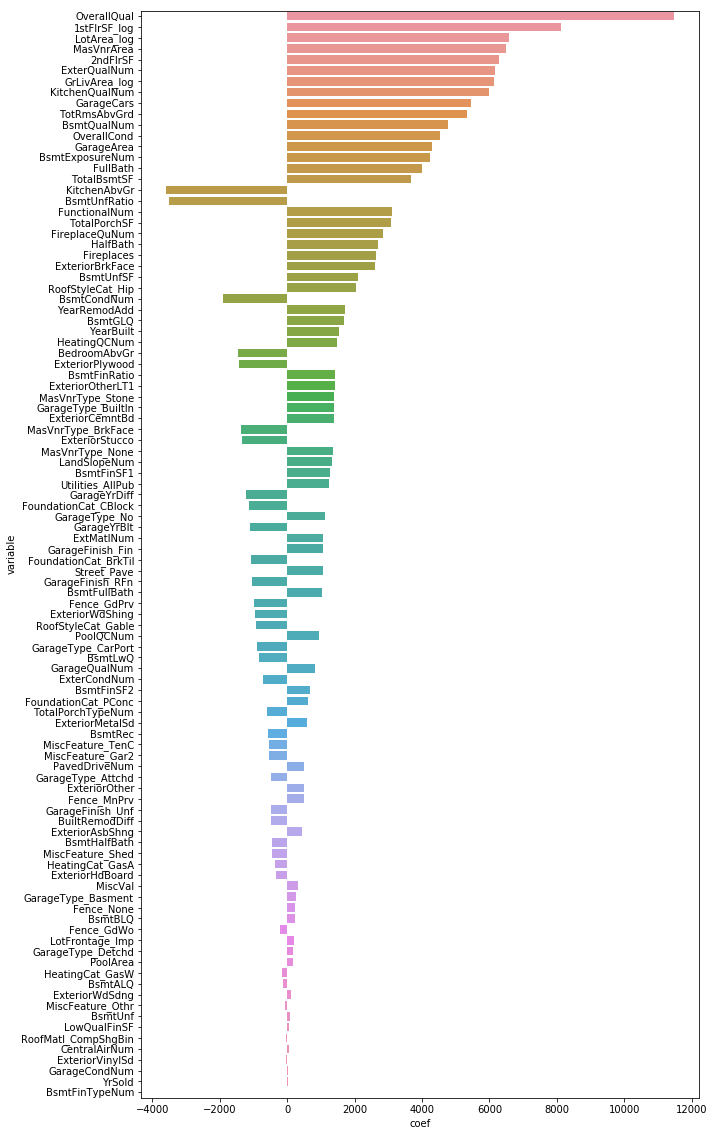

In [56]:
Xlog_scale_df = pd.DataFrame(data=Xlog_scale, 
                             columns=broad_log_train.drop(['MoSold', 'SalePrice_log'], axis=1).columns)

plt.figure(figsize=(10, 20))
view_coeff(Xlog_scale_df, elasticCV)
plt.show()

In [57]:
elast_log_preds = elasticCV.predict(Xlog_test_scale)

print("RMSE: ", mean_squared_error(y_test, elast_log_preds) ** (1/2))

RMSE:  30239.364697938185
